# Quickstart

In this simple example we will generate some simulated data, and fit them with 3ML.

Let's start by generating our dataset:

In [1]:
from threeML import *

# Let's generate some data with y = Powerlaw(x)

gen_function = Powerlaw()


# Generate a dataset using the power law, and a
# constant 30% error

x = np.logspace(0, 2, 50)

xyl_generator = XYLike.from_function("sim_data", function = gen_function, 
                                     x = x, 
                                     yerr = 0.3 * gen_function(x))

y = xyl_generator.y
y_err = xyl_generator.yerr


WARNING ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.


WARNING RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.



Configuration read from /home/giacomov/.threeML/threeML_config.yml
Using chi2 statistic with the provided errors.


We can now fit it easily with 3ML:

In [2]:
fit_function = Powerlaw()

xyl = XYLike("data", x, y, y_err)

parameters, like_values = xyl.fit(fit_function)

Using chi2 statistic with the provided errors.
Best fit values:



,Value,Unit
source.spectrum.main.Powerlaw.K,1.01 +/- 0.06,1 / (cm2 keV s)
source.spectrum.main.Powerlaw.index,-2.004 +/- 0.022,



Correlation matrix:



1.00,-0.86
-0.86,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
data,53.695324
total,53.695324


Plot data and model:

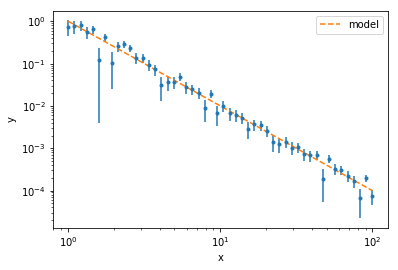

In [3]:
xyl.plot(x_scale='log', y_scale='log')

Compute the goodness of fit using Monte Carlo simulations (NOTE: if you repeat this exercise from the beginning many time, you should find that the quantity "gof" is a random number distributed uniformly between 0 and 1. That is the expected result if the model is a good representation of the data)

In [4]:
gof, all_results, all_like_values = xyl.goodness_of_fit()

print("The null-hypothesis probability from simulations is %.2f" % gof['data'])

The null-hypothesis probability from simulations is 0.28


The procedure outlined above works for any distribution for the data (Gaussian or Poisson). In this case, since we are using Gaussian data and the $\chi^2$ statistic, we can also use the $\chi^2$ test, which give the same result without performing simulations:

In [5]:
import scipy.stats

# Compute the number of degrees of freedom
n_dof = len(xyl.x) - len(fit_function.free_parameters)

# Get the observed value for chi2
obs_chi2 = like_values['-log(likelihood)']['data']

theoretical_gof = scipy.stats.chi2(n_dof).sf(obs_chi2)

print("The null-hypothesis probability from theory is %.2f" % theoretical_gof)

The null-hypothesis probability from theory is 0.27
